Consider the [scatterplot](https://python-graph-gallery.com/scatter-plot/) on the left hand side of this figure. A lot of dots **overlap** and they make the figure hard to read. Even worse, it is impossible to determine how many data points are in each position. In this case, a possible solution is to cut the plotting window into several **bins**, and represent the number of data points in each bin by a color. Following the shape of the bin, this makes **Hexbin plot** or **2D histogram**.

Then, it is possible to make a **smoother** result using **Gaussian KDE** (kernel density estimate). Its representation is called a **2D density plot**, and you can add a **contour** to denote each step. You can see more examples of these types of graphics in the [2D density section](https://python-graph-gallery.com/2d-density-plot/) of the [python graph gallery](http://www.python-graph-gallery.com/). This plot has been inspired by this [stack overflow](https://stackoverflow.com/questions/19390320/scatterplot-contours-in-matplotlib) question.

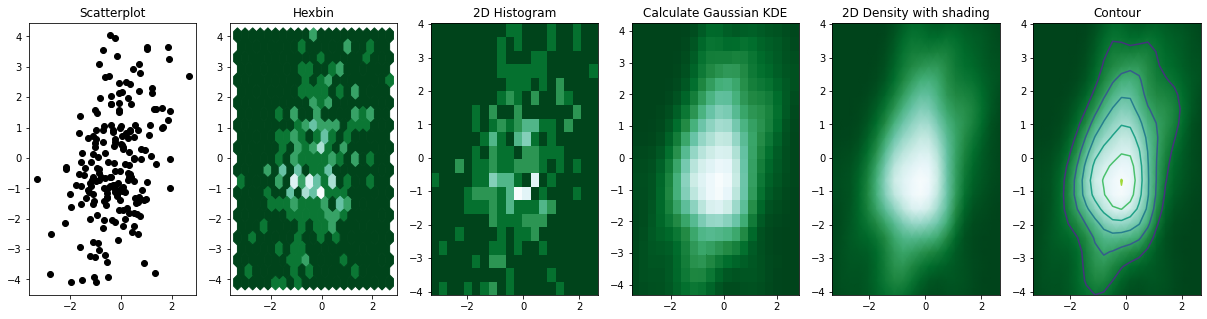

In [8]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overlapping here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )